# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels as sm
from scipy import stats as st
from bioinfokit.analys import stat
import matplotlib.pyplot as plt

# Load Data


In [2]:
subjects = [100610, 102311, 102816, 104416, 105923,
            108323, 109123, 111514, 114823, 115017,
            115825, 116726, 118225, 125525, 126426,
            128935, 130114, 130518, 131217, 131722,
            132118, 134627, 134829, 135124, 137128,
            140117, 144226, 145834, 146129, 146432,
            146735, 146937, 148133, 150423, 155938,
            156334, 157336, 158035, 158136, 159239,
            162935, 164131, 164636, 165436, 167036,
            167440, 169040, 169343, 169444, 169747]
mse_sub = []
for sub in subjects:
    loc = "ae_MSE/" + str(sub) + '_regional_MSE_20.csv'
    df = pd.read_csv(loc,index_col=0)
    mse_sub.append(df)    
print('There are ' + str(len(mse_sub)) + ' subjects.')
print('For each subject, there are ' + str(mse_sub[0].shape[0]) + ' sessions.')
print('For each session, there are ' + str(mse_sub[0].shape[1]) + ' regional MSE.')

There are 50 subjects.
For each subject, there are 14 sessions.
For each session, there are 379 regional MSE.


In [3]:
mse_sub[0].head(5)

,L_V1,L_MST,L_V6,L_V2,L_V3,L_V4,L_V8,L_4,L_3b,L_FEF,...,diencephalon_right,hippocampus_left,hippocampus_right,pallidum_left,pallidum_right,putamen_left,putamen_right,thalamus_left,thalamus_right,brainStem
movie1,0.011017,0.004830,0.010033,0.002520,0.002549,0.002499,0.004675,0.001577,0.003714,0.003422,...,0.005843,0.003384,0.003437,0.017844,0.019864,0.005246,0.007848,0.001474,0.001410,0.005820
movie2,0.008748,0.006574,0.007975,0.002636,0.002412,0.002034,0.005404,0.002158,0.003033,0.003041,...,0.004493,0.002857,0.002597,0.013452,0.015838,0.004227,0.005770,0.001527,0.001977,0.004744
movie3,0.009799,0.009289,0.010636,0.002339,0.002519,0.003128,0.006469,0.002617,0.004910,0.002943,...,0.003305,0.002180,0.003006,0.010232,0.011078,0.004280,0.005866,0.002262,0.002055,0.003329
movie4,0.007503,0.004619,0.007421,0.002797,0.002877,0.002225,0.005164,0.001651,0.004299,0.002739,...,0.004377,0.002289,0.002413,0.012134,0.013734,0.003404,0.004969,0.002021,0.001885,0.004006
rest1,0.006070,0.005455,0.005250,0.002382,0.002577,0.002186,0.004006,0.001900,0.003785,0.003163,...,0.004854,0.003145,0.003182,0.015413,0.017331,0.004585,0.006064,0.001673,0.001499,0.004793


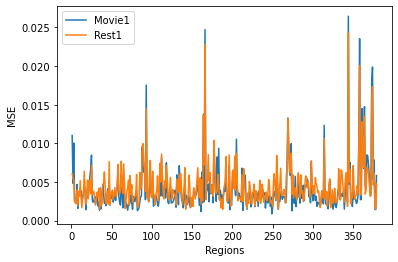

In [4]:
plt.plot(np.arange(1,380), mse_sub[0].iloc[0], label='Movie1')
plt.plot(np.arange(1,380), mse_sub[0].iloc[4], label='Rest1')
plt.xlabel("Regions")
plt.ylabel('MSE')
plt.legend()
plt.savefig("100610.jpg")

# Whole brain t-test


In [5]:
# calculate the whole brain mean MSE for each subject
mean_mse = []

for sub in mse_sub:
    sub.mean(axis=1)
    sub['AVG'] = sub.mean(axis=1)

In [6]:
mse_sub[1].head()

,L_V1,L_MST,L_V6,L_V2,L_V3,L_V4,L_V8,L_4,L_3b,L_FEF,...,hippocampus_left,hippocampus_right,pallidum_left,pallidum_right,putamen_left,putamen_right,thalamus_left,thalamus_right,brainStem,AVG
movie1,0.010915,0.006951,0.011236,0.002412,0.003019,0.004317,0.006295,0.002570,0.003489,0.003482,...,0.002353,0.002499,0.007286,0.008486,0.003764,0.004628,0.003429,0.003717,0.002505,0.004564
movie2,0.011814,0.005093,0.012981,0.002458,0.003476,0.004133,0.004394,0.002304,0.004576,0.003166,...,0.001771,0.001712,0.002995,0.002696,0.002825,0.003162,0.002387,0.002684,0.001190,0.003852
movie3,0.006119,0.003706,0.005836,0.001073,0.001734,0.002481,0.003579,0.001503,0.002174,0.001582,...,0.001276,0.001430,0.001094,0.000761,0.001204,0.001206,0.001011,0.001329,0.000436,0.002498
movie4,0.006566,0.003047,0.004469,0.001145,0.001820,0.001947,0.002813,0.001386,0.002041,0.001208,...,0.001348,0.001681,0.001335,0.001207,0.001735,0.001611,0.001170,0.001349,0.000675,0.002252
rest1,0.006188,0.003310,0.003793,0.002258,0.003516,0.003919,0.004323,0.002253,0.002851,0.001227,...,0.003557,0.004406,0.005665,0.006650,0.002468,0.002831,0.001438,0.001965,0.001943,0.003670


In [7]:
# get 50 * MSE values for movie1 session
mse_movie1 = []
for sub in mse_sub:
    mse_movie1.append(sub.loc['movie1', 'AVG'])
print(len(mse_movie1))

mse_retbar1 = []
for sub in mse_sub:
    mse_retbar1.append(sub.loc['retbar1', 'AVG'])
print(len(mse_retbar1))

# get 50 * MSE values for rest1 session
mse_rest1 = []
for sub in mse_sub:
    mse_rest1.append(sub.loc['rest1', 'AVG'])
print(len(mse_rest1))

# get 200 * MSE values for rest sessions
mse_rest_all = []
for sub in mse_sub:
    mse_rest_all.append(sub.loc['rest1', 'AVG'])
    mse_rest_all.append(sub.loc['rest2', 'AVG'])
    mse_rest_all.append(sub.loc['rest3', 'AVG'])
    mse_rest_all.append(sub.loc['rest4', 'AVG'])
print(len(mse_rest_all))

50
50
50
200


### T-test

#### Paired t-test for 50(movie1):50(rest1)

In [8]:
# Paired t-test for 50(movie1):50(rest1)
t_stat_1, p_1 = st.ttest_rel(a=mse_movie1, b=mse_rest1)
print('Use Scipy')
print('t-statsitic = ' + str(t_stat_1))
print('p-value = ' + str(p_1))

Use Scipy
t-statsitic = 0.3208405039422869
p-value = 0.7496956687154361


In [9]:
# # 2 sample t-test for 50(movie1):50(rest1)
# df_list_1 = []
# for n in mse_movie1:
#     df_list_1.append(['movie1', n])
# for n in mse_rest1:
#     df_list_1.append(['rest1', n])
# df_1 = pd.DataFrame(df_list_1, columns=['type', 'MSE'])

# te = stat()
# te.ttest(df=df_1, xfac="type", res="MSE", test_type=2)
# print(te.summary)

#### 2 sample t-test for 50(movie1):200(rest_all)

In [10]:
# 2 sample t-test for 50(movie1):200(rest_all)
t_stat_2, p_2 = st.ttest_ind(a=mse_movie1, b=mse_rest_all)
print('2 sample t-test for 50(movie1):200(rest_all)')
print('t-statsitic = ' + str(t_stat_2))
print('p-value = ' + str(p_2))

2 sample t-test for 50(movie1):200(rest_all)
t-statsitic = 1.5099409755381492
p-value = 0.13233149870616412


In [11]:
# 2 sample t-test for 50(movie1):200(rest_all)
df_list_2 = []
for n in mse_movie1:
    df_list_2.append(['movie1', n])
for n in mse_rest_all:
    df_list_2.append(['rest', n])
df_2 = pd.DataFrame(df_list_2, columns=['type', 'MSE'])

te = stat()
te.ttest(df=df_2, xfac="type", res="MSE", test_type=2)
print(te.summary)


Two sample t-test with equal variance

------------------  -------------
Mean diff             0.000163031
t                     1.50994
Std Error             0.000107972
df                  248
P-value (one-tail)    0.0661657
P-value (two-tail)    0.132331
Lower 95.0%          -4.96275e-05
Upper 95.0%           0.000375689
------------------  -------------

Parameter estimates

Level      Number        Mean      Std Dev    Std Error    Lower 95.0%    Upper 95.0%
-------  --------  ----------  -----------  -----------  -------------  -------------
movie1         50  0.0035813   0.00062311   8.81211e-05     0.00340421     0.00375839
rest          200  0.00341827  0.000696802  4.92713e-05     0.00332111     0.00351543



#### Paired t-test for 50(retbar1):50(rest1)

In [12]:
# Paired t-test for 50(retbar1):50(rest1)
t_stat_3, p_3 = st.ttest_rel(a=mse_retbar1, b=mse_rest1)
print('2 sample t-test for 50(retbar1):50(rest1)')
print('t-statsitic = ' + str(t_stat_3))
print('p-value = ' + str(p_3))

2 sample t-test for 50(retbar1):50(rest1)
t-statsitic = 7.712482445684847
p-value = 5.270505185439038e-10


In [13]:
# # 2 sample t-test for 50(retbar1):200(rest_all)
# df_list_3 = []
# for n in mse_retbar1:
#     df_list_3.append(['retbar1', n])
# for n in mse_rest1:
#     df_list_3.append(['rest1', n])
# df_3 = pd.DataFrame(df_list_3, columns=['type', 'MSE'])

# te = stat()
# te.ttest(df=df_3, xfac="type", res="MSE", test_type=2)
# print(te.summary)

#### 2 sample t-test for 50(retbar1):200(rest_all)

In [14]:
# 2 sample t-test for 50(retbar1):200(rest_all)
t_stat_4, p_4 = st.ttest_ind(a=mse_retbar1, b=mse_rest_all, equal_var=False)
print('2 sample t-test for 50(retbar1):200(rest_all)')
print('t-statsitic = ' + str(t_stat_4))
print('p-value = ' + str(p_4))

2 sample t-test for 50(retbar1):200(rest_all)
t-statsitic = 9.13072219138085
p-value = 1.7498329956570778e-13


In [15]:
# 2 sample t-test for 50(retbar1):200(rest_all)
df_list_4 = []
for n in mse_retbar1:
    df_list_4.append(['retbar1', n])
for n in mse_rest_all:
    df_list_4.append(['rest', n])
df_4 = pd.DataFrame(df_list_4, columns=['type', 'MSE'])

te = stat()
te.ttest(df=df_4, xfac="type", res="MSE", test_type=2, evar=False)
print(te.summary)


Two sample t-test with unequal variance (Welch's t-test)

------------------  ------------
Mean diff           -0.00112323
t                   -9.13072
Std Error            0.000123017
df                  68.8948
P-value (one-tail)   8.74916e-14
P-value (two-tail)   1.74983e-13
Lower 95.0%         -0.00136865
Upper 95.0%         -0.000877812
------------------  ------------

Parameter estimates

Level      Number        Mean      Std Dev    Std Error    Lower 95.0%    Upper 95.0%
-------  --------  ----------  -----------  -----------  -------------  -------------
rest          200  0.00341827  0.000696802  4.92713e-05     0.00332111     0.00351543
retbar1        50  0.0045415   0.000797038  0.000112718     0.00431498     0.00476801

